In [2]:
#import relevant libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [418]:
#read all the train fault data and aircon overhaul date data
df = pd.read_excel(r"defect.xlsx", sheet_name="aircon defect")  
tb = pd.read_excel(r"defect.xlsx", sheet_name="aircon overhaul") 

# Explortary Data Analysis

In [419]:
#exploring the head, shape and type of the 2 dataframe
print(df.shape,"\n")

print(df.sample(5),"\n")

print(df.dtypes,"\n")

print("-------------------------------------------------------------------------------------------------------\n")

print(tb.shape,"\n")

print(tb.sample(5),"\n")

print(tb.describe(),"\n")

print(tb.dtypes,"\n")

(2123, 3) 

         Record          Cause Train Number
511  2016-12-16   Others Fault         AB39
1118 2018-09-14  Type 48 Fault         AB21
1032 2018-05-09   Type 3 Fault         AB15
1493 2020-01-28   Type 3 Fault         AB46
726  2017-06-06  Type 48 Fault         AB27 

Record          datetime64[ns]
Cause                   object
Train Number            object
dtype: object 

-------------------------------------------------------------------------------------------------------

(8, 2) 

  Train Number Overhaul Date
7         AB37    2021-12-01
5         AB19    2021-04-08
4         AB24    2021-06-18
1         AB34    2021-10-20
2         AB30    2021-09-01 

       Train Number        Overhaul Date
count             8                    8
unique            8                    8
top            AB50  2021-12-15 00:00:00
freq              1                    1
first           NaN  2021-03-05 00:00:00
last            NaN  2021-12-15 00:00:00 

Train Number             object
Ov

C:\Users\Darius\AppData\Local\Temp/ipykernel_3724/472868544.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(tb.describe(),"\n")


In [420]:
#standardise the train number column name between tb and df
tb.rename(columns = {"Train":"Train Number"}, inplace=True)

#join tb and df. Using inner join so that we only keep train number that has it's aircon overhauled.
dfjoined = df.merge(tb, on="Train Number", how='inner') # join df and tb together

#join column substring with "_"
dfjoined.columns = dfjoined.columns.str.replace(" ","_")

print(dfjoined.sample(5),"\n")
print(dfjoined.dtypes,"\n")

                 Record          Cause Train_Number Overhaul_Date
175 2017-05-24 00:00:00   Others Fault         AB37    2021-12-01
317 2021-09-17 03:12:02   Type 2 Fault         AB19    2021-04-08
229 2021-05-10 00:00:00   Type 2 Fault         AB30    2021-09-01
226 2021-03-21 00:00:00   Type 2 Fault         AB30    2021-09-01
340 2019-06-17 00:00:00  Type 48 Fault         AB24    2021-06-18 

Record           datetime64[ns]
Cause                    object
Train_Number             object
Overhaul_Date    datetime64[ns]
dtype: object 



<AxesSubplot:xlabel='Train_Number', ylabel='Count'>

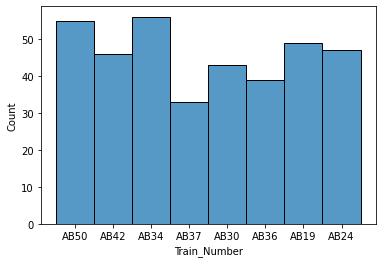

In [421]:
#number of aircon defect for all the overhauled trains. There are no adnormally low/high defect for each trains.
import seaborn as sns

sns.histplot(x = "Train_Number", data = dfjoined)

<AxesSubplot:xlabel='Cause', ylabel='Count'>

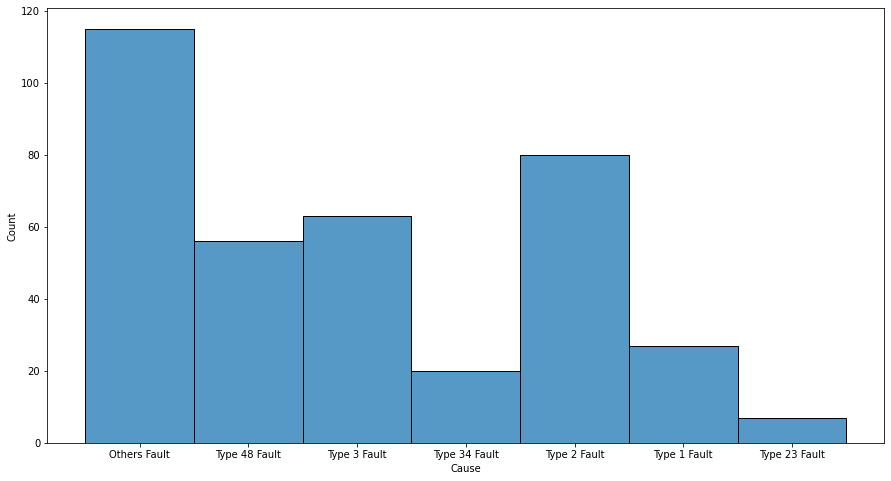

In [422]:
"""
#number of aircon defect type for all the overhauled trains. 
#Majority of the fault cause are attributed to "others" which are cosmetic damages.

"""


import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.histplot(x = "Cause", data = dfjoined )

In [423]:
#changing the data format 
dfjoined['Record'] = pd.to_datetime(dfjoined['Record'].dt.date, format = '%Y-%m-%d')

In [424]:
# column creation

#create a new column to record days that fault happened after train overhauled.
dfjoined["Days_After_Overhaul"] = dfjoined["Record"] - dfjoined["Overhaul_Date"] 

#create a new column to record days that fault happened before train overhauled.
dfjoined["Days_Before_Overhaul"] = dfjoined["Overhaul_Date"] - dfjoined["Record"] 
dfjoined.Days_After_Overhaul = dfjoined.Days_After_Overhaul.dt.days.map(lambda x: 0.0 if x<0.0 else x)
dfjoined.Days_Before_Overhaul = dfjoined.Days_Before_Overhaul.dt.days.map(lambda x: 0.0 if x<0.0 else x)

dfjoined

,Record,Cause,Train_Number,Overhaul_Date,Days_After_Overhaul,Days_Before_Overhaul
0,2016-01-01,Others Fault,AB50,2021-12-15,0.0,2175.0
1,2016-01-15,Others Fault,AB50,2021-12-15,0.0,2161.0
2,2016-02-01,Others Fault,AB50,2021-12-15,0.0,2144.0
3,2016-03-23,Others Fault,AB50,2021-12-15,0.0,2093.0
4,2016-04-08,Others Fault,AB50,2021-12-15,0.0,2077.0
...,...,...,...,...,...,...
363,2021-11-07,Type 3 Fault,AB24,2021-06-18,142.0,0.0
364,2021-11-14,Type 2 Fault,AB24,2021-06-18,149.0,0.0
365,2022-03-04,Type 1 Fault,AB24,2021-06-18,259.0,0.0
366,2022-04-23,Type 34 Fault,AB24,2021-06-18,309.0,0.0


In [425]:
#assign 1 to fault happened after overhaul, 0 to fault happened before overhaul.
dfjoined["fault_after_overhauled"] = "" 

#assign 1 to fault happened before overhaul, 0 to fault happened after overhaul.
dfjoined["fault_before_overhauled"] = "" 

#turn train number from str to int
dfjoined["Train_Number"] = dfjoined["Train_Number"].str[2:].astype(int)

In [426]:
dfjoined.sample(5)

,Record,Cause,Train_Number,Overhaul_Date,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled
203,2017-06-08,Type 48 Fault,30,2021-09-01,0.0,1546.0,,
136,2019-11-18,Type 2 Fault,34,2021-10-20,0.0,702.0,,
195,2016-05-24,Type 2 Fault,30,2021-09-01,0.0,1926.0,,
263,2020-11-10,Type 3 Fault,36,2021-03-05,0.0,115.0,,
65,2017-11-17,Type 34 Fault,42,2021-07-22,0.0,1343.0,,


In [427]:
#create double for loop to assign before or after to fault happened after/before overhaul.

i=0.0
x=0.0

for i in range(dfjoined["Train_Number"].max()+1): #checking each PV number on the data 1 by 1
    #print("b")
    for x in range(len(dfjoined)):   
        if i == dfjoined["Train_Number"][x]:
            
            #check for fault record date happened after overhaul record date
            if dfjoined['Overhaul_Date'][x] < dfjoined['Record'][x]: 
                dfjoined.at[x, "fault_after_overhauled"] = 1.0  # assign 1 if statement above is True.
                dfjoined.at[x, "fault_before_overhauled"] = 0.0
                x =+1
               
            #check for fault record date happened before overhaul record date
            elif dfjoined['Overhaul_Date'][x] > dfjoined['Record'][x]: 
                dfjoined.at[x, "fault_after_overhauled"] = 0.0
                dfjoined.at[x, "fault_before_overhauled"] = 1.0 # assign 1 if statement above is True.
                x =+1
                
            else:
                dfjoined.at[x, "fault_after_overhauled"] = 0.0                           
                dfjoined.at[x, "fault_before_overhauled"] = 0.0
                x =+1                
        else:
             x =+1           
    i =+1
    x = 0

In [428]:
dfjoined

,Record,Cause,Train_Number,Overhaul_Date,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled
0,2016-01-01,Others Fault,50,2021-12-15,0.0,2175.0,0.0,1.0
1,2016-01-15,Others Fault,50,2021-12-15,0.0,2161.0,0.0,1.0
2,2016-02-01,Others Fault,50,2021-12-15,0.0,2144.0,0.0,1.0
3,2016-03-23,Others Fault,50,2021-12-15,0.0,2093.0,0.0,1.0
4,2016-04-08,Others Fault,50,2021-12-15,0.0,2077.0,0.0,1.0
...,...,...,...,...,...,...,...,...
363,2021-11-07,Type 3 Fault,24,2021-06-18,142.0,0.0,1.0,0.0
364,2021-11-14,Type 2 Fault,24,2021-06-18,149.0,0.0,1.0,0.0
365,2022-03-04,Type 1 Fault,24,2021-06-18,259.0,0.0,1.0,0.0
366,2022-04-23,Type 34 Fault,24,2021-06-18,309.0,0.0,1.0,0.0


In [429]:
#group data based on train.
dfjoinedpivot_pt_s = dfjoined.iloc[:,[2,4,5]].pivot_table(index = ["Train_Number"], aggfunc="sum")
dfjoinedpivot_pt_c = dfjoined.iloc[:,[2,6,7]].pivot_table(index = ["Train_Number"], aggfunc="sum")
result = dfjoinedpivot_pt_s.merge(right = dfjoinedpivot_pt_c, how = "inner" ,on = ["Train_Number"])
result

,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled
Train_Number,,,,
19,1386.0,41352.0,9.0,40.0
24,1186.0,33165.0,6.0,41.0
30,212.0,42610.0,2.0,41.0
34,39.0,60855.0,2.0,54.0
36,1404.0,34298.0,7.0,32.0
37,127.0,48628.0,3.0,30.0
42,702.0,40182.0,5.0,41.0
50,62.0,65167.0,1.0,54.0


In [430]:
# create a new column to normalise overhauled days, using fault count.
# higher overhauled_days_per_fault means it takes more days for a fault to happened.
result["overhauled_days_per_fault"] = result["Days_After_Overhaul"] / result["fault_after_overhauled"]

# create a new column to normalise unoverhauled days, using fault count. 
# higher unoverhauled_days_per_fault means it takes more days for a fault to happened.
result["unoverhauled_days_per_fault"] = result["Days_Before_Overhaul"] / result["fault_before_overhauled"]

In [431]:
result

,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled,overhauled_days_per_fault,unoverhauled_days_per_fault
Train_Number,,,,,,
19,1386.0,41352.0,9.0,40.0,154.000000,1033.800000
24,1186.0,33165.0,6.0,41.0,197.666667,808.902439
30,212.0,42610.0,2.0,41.0,106.000000,1039.268293
34,39.0,60855.0,2.0,54.0,19.500000,1126.944444
36,1404.0,34298.0,7.0,32.0,200.571429,1071.812500
37,127.0,48628.0,3.0,30.0,42.333333,1620.933333
42,702.0,40182.0,5.0,41.0,140.400000,980.048780
50,62.0,65167.0,1.0,54.0,62.000000,1206.796296


In [432]:
result.overhauled_days_per_fault = result.overhauled_days_per_fault.fillna(1.0)
result.unoverhauled_days_per_fault = result.unoverhauled_days_per_fault.fillna(1.0)

In [433]:
#create a new column to check for the result if there is a drop in the aircon fault after a train aircon has gone through overhaul.
result["final_score"] = "" 

In [434]:
#To check what is the ratio between overhauled days per fault with unoverhauled days per fault. higher is better.
result["final_score"] = (result['overhauled_days_per_fault']) / (result['unoverhauled_days_per_fault'] )

result = result.sort_values(by = ["final_score"], ascending = False) #sort data by final scores
result

,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled,overhauled_days_per_fault,unoverhauled_days_per_fault,final_score
Train_Number,,,,,,,
24,1186.0,33165.0,6.0,41.0,197.666667,808.902439,0.244364
36,1404.0,34298.0,7.0,32.0,200.571429,1071.812500,0.187133
19,1386.0,41352.0,9.0,40.0,154.000000,1033.800000,0.148965
42,702.0,40182.0,5.0,41.0,140.400000,980.048780,0.143258
30,212.0,42610.0,2.0,41.0,106.000000,1039.268293,0.101995
50,62.0,65167.0,1.0,54.0,62.000000,1206.796296,0.051376
37,127.0,48628.0,3.0,30.0,42.333333,1620.933333,0.026117
34,39.0,60855.0,2.0,54.0,19.500000,1126.944444,0.017303


Based on the final score, all the train did not do better after aircon overhaul. The ratio shows that there are increasing aircon defect after overhaul. Lets look at the cause of each failure.

In [435]:
#group data based on cause.
dfjoinedpivot_pt_s = dfjoined.iloc[:,[1,4,5]].pivot_table(index = ["Cause"], aggfunc="sum")
dfjoinedpivot_pt_c = dfjoined.iloc[:,[1,6,7]].pivot_table(index = ["Cause"], aggfunc="sum")
result2 = dfjoinedpivot_pt_s.merge(right = dfjoinedpivot_pt_c, how = "inner" ,on = "Cause")
result2

,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled
Cause,,,,
Others Fault,430.0,131176.0,6.0,109.0
Type 1 Fault,690.0,31764.0,3.0,24.0
Type 2 Fault,1490.0,59501.0,11.0,69.0
Type 23 Fault,124.0,4284.0,1.0,6.0
Type 3 Fault,1155.0,50072.0,8.0,55.0
Type 34 Fault,327.0,21841.0,2.0,18.0
Type 48 Fault,902.0,67619.0,4.0,52.0


In [436]:
# create a new column to normalise overhauled days, using fault count.
# higher overhauled_days_per_fault means it takes more days for a fault to happened.
result2["overhauled_days_per_fault"] = result2["Days_After_Overhaul"] / result2["fault_after_overhauled"]

# create a new column to normalise unoverhauled days, using fault count. 
# higher unoverhauled_days_per_fault means it takes more days for a fault to happened.
result2["unoverhauled_days_per_fault"] = result2["Days_Before_Overhaul"] / result2["fault_before_overhauled"]

In [437]:
result2.overhauled_days_per_fault = result2.overhauled_days_per_fault.fillna(1.0)
result2.unoverhauled_days_per_fault = result2.unoverhauled_days_per_fault.fillna(1.0)

In [438]:
#create a new column to check for the result if there is a drop in the aircon fault after a train aircon has gone through overhaul.
result2["final_score"] = "" 

In [439]:
#To check what is the ratio between overhauled days per fault with unoverhauled days per fault. higher is better.
result2["final_score"] = (result2['overhauled_days_per_fault']) / (result2['unoverhauled_days_per_fault'] )

result2 = result2.sort_values(by = ["final_score"], ascending = False) #sort data by final scores
result2

,Days_After_Overhaul,Days_Before_Overhaul,fault_after_overhauled,fault_before_overhauled,overhauled_days_per_fault,unoverhauled_days_per_fault,final_score
Cause,,,,,,,
Type 1 Fault,690.0,31764.0,3.0,24.0,230.000000,1323.500000,0.173782
Type 23 Fault,124.0,4284.0,1.0,6.0,124.000000,714.000000,0.173669
Type 48 Fault,902.0,67619.0,4.0,52.0,225.500000,1300.365385,0.173413
Type 3 Fault,1155.0,50072.0,8.0,55.0,144.375000,910.400000,0.158584
Type 2 Fault,1490.0,59501.0,11.0,69.0,135.454545,862.333333,0.157079
Type 34 Fault,327.0,21841.0,2.0,18.0,163.500000,1213.388889,0.134747
Others Fault,430.0,131176.0,6.0,109.0,71.666667,1203.449541,0.059551


Interesting, Overhauling of the aircon did not improve the reliability of the aircon specific type defects (Type 1,2,3,23,34,48). This concludes that there are no coorelationship between aircon defect and aircon overhaul.